In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Data/train/"

In [ ]:
for i in os.listdir(path):
  print(i,len(os.listdir(path+i)))

PNEUMONIA 3002
COVID19 78
NORMAL 94


In [ ]:
import keras
import keras.utils as image
import matplotlib.pyplot as plt

In [ ]:
img=image.load_img(path+'COVID19/COVID19(116).jpg')

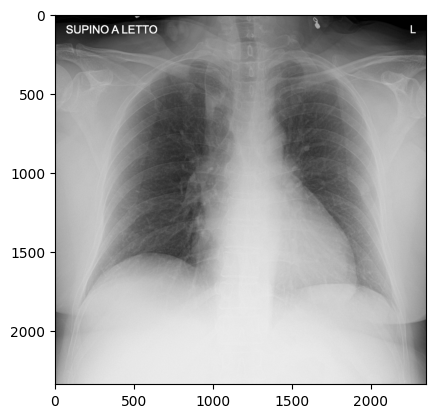

In [ ]:
plt.imshow(img)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_X=ImageDataGenerator(
    rescale=1/255, #multiplies each data with 1/255 to normalize
    rotation_range=20, #tilting image by 20 degree (Data Augumentation refers to changing the input slightly by tilting,shear,rotating etc. Data augumentation is mostly used when
                      #there is lack of train data and hence we train each image with a new perspective to increase the features)
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True
)

In [ ]:
train_gen=train_X.flow_from_directory(path,
                                      target_size=(250,250),
                                      batch_size=30,
                                      class_mode='categorical', # to tell which class the input belongs to
                                      )

Found 3174 images belonging to 3 classes.


In [ ]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAvgPool2D

In [ ]:
class_weights={0:1,
               1:2,
               2:2}

In [ ]:
resnet_model=ResNet50(weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in resnet_model.layers:
  layer.trainable=True

In [ ]:
model_output=resnet_model.output
model_output=GlobalAvgPool2D()(model_output)
model_output=Dense(1024,activation='relu')(model_output)
model_output=Dense(3,activation='softmax')(model_output)

In [ ]:
model=Model(inputs=resnet_model.input,outputs=model_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
adam=keras.optimizers.Adam(learning_rate=0.03)
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
hist=model.fit(train_gen,epochs=30,class_weight=class_weights)

Epoch 1/30
106/106 [==============================] - 540s 5s/step - loss: 0.2264 - accuracy: 0.9502 - precision: 0.9588 - recall: 0.9464
Epoch 2/30
106/106 [==============================] - 99s 929ms/step - loss: 0.1555 - accuracy: 0.9612 - precision: 0.9666 - recall: 0.9575
Epoch 3/30
106/106 [==============================] - 97s 912ms/step - loss: 0.1300 - accuracy: 0.9625 - precision: 0.9688 - recall: 0.9578
Epoch 4/30
106/106 [==============================] - 102s 953ms/step - loss: 0.1216 - accuracy: 0.9672 - precision: 0.9710 - recall: 0.9616
Epoch 5/30
106/106 [==============================] - 98s 924ms/step - loss: 0.1129 - accuracy: 0.9729 - precision: 0.9750 - recall: 0.9704
Epoch 6/30
106/106 [==============================] - 100s 940ms/step - loss: 0.1083 - accuracy: 0.9732 - precision: 0.9753 - recall: 0.9685
Epoch 7/30
106/106 [==============================] - 96s 906ms/step - loss: 0.0892 - accuracy: 0.9754 - precision: 0.9800 - recall: 0.9745
Epoch 8/30
106/106 [